## Analysis of Open University Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
assessments_df=pd.read_csv('OULAD/assessments.csv')
courses_df=pd.read_csv('OULAD/courses.csv')
studentAssessment_df=pd.read_csv('OULAD/studentAssessment.csv')
studentInfo_df=pd.read_csv('OULAD/studentInfo.csv')
studentRegistration_df=pd.read_csv('OULAD/studentRegistration.csv')
studentvle_df=pd.read_csv('OULAD/studentvle.csv')
vle_df=pd.read_csv('OULAD/vle.csv')

### Analyzing student results based on number of credits registered for

In [4]:
#Joining assessment and course data
ass_course_df=pd.merge(assessments_df,courses_df,how='left',on=['code_module','code_presentation'])

In [5]:
#joining existing data with the student assessment data
studass_ass_course_df=pd.merge(studentAssessment_df,ass_course_df,how='left',on='id_assessment')

In [6]:
#combining this data with the student information data
info_studass_ass_course_df=pd.merge(studass_ass_course_df,studentInfo_df,how='left',on=['code_module','code_presentation','id_student'])


In [7]:
#Creating bins of student credits enrolled to identify trends in final result based on credits enrolled
studentInfo_df['bin'] = pd.cut(studentInfo_df['studied_credits'], [0,100,300,700,1000], labels=['0-100','100-300','300-700','Above 700'])

In [8]:
studentVle_df7=studentInfo_df.groupby('bin')['bin'].agg({'count'}).reset_index()

In [9]:
studentVle_df6=studentInfo_df.groupby(['bin', 'final_result'])['final_result'].agg({'count'}).reset_index()


In [14]:
studentVle_df8=pd.merge(studentVle_df6,studentVle_df7,how='left',on='bin')

In [15]:
#Calculating percentage of people in each category who fall in the each total result
studentVle_df8['Percent of total']=(studentVle_df8['count_x']/studentVle_df8['count_y'])*100

In [17]:
studentVle_df8.head()

,bin,final_result,count_x,count_y,Percent of total
0,0-100,Distinction,2409,23980,10.045872
1,0-100,Fail,5399,23980,22.514595
2,0-100,Pass,9737,23980,40.604671
3,0-100,Withdrawn,6435,23980,26.834862
4,100-300,Distinction,614,8578,7.157846


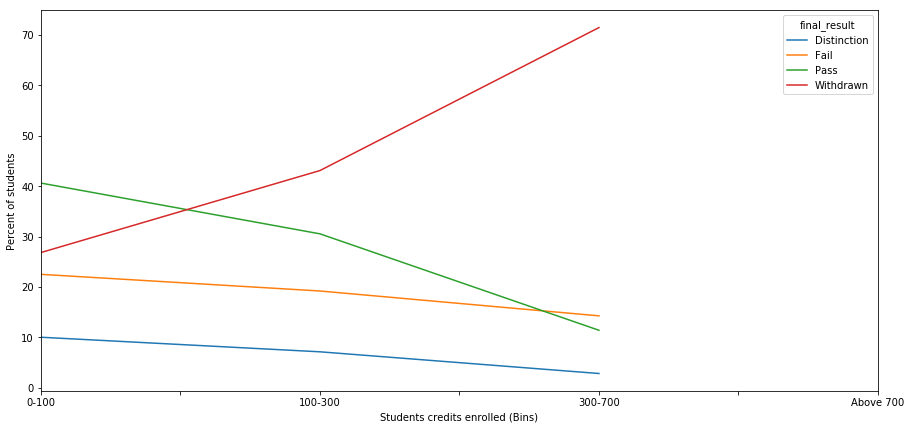

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
studentVle_df8.groupby(['bin','final_result']).sum()['Percent of total'].unstack().plot(ax=ax)
ax.set_xlabel('Students credits enrolled (Bins)')
ax.set_ylabel('Percent of students')

### We notice that as the number of credits the student enrolls increases, we find significant increase in withdrawl rates. We also notice slight decrease in pass rates of students

## Next we need to understand the pass, fail and withdrawl rate distrubution among courses

In [24]:
code_module_count=studentInfo_df.groupby(['code_module','final_result']).agg({'code_presentation':'count'}).reset_index()

In [25]:
code_module_total=studentInfo_df.groupby('code_module').agg({'code_presentation':'count'}).reset_index()

In [26]:
code_module_total_percent=pd.merge(code_module_count,code_module_total,how='left',on=['code_module'])

In [28]:
code_module_total_percent['percent_of_total']=(code_module_total_percent['code_presentation_x']/code_module_total_percent['code_presentation_y'])*100

In [29]:
#Sorting the number of people in each 'final_result' for each code module
code_module_total_percent_sort=code_module_total_percent.sort_values(['code_module','percent_of_total'],ascending=[True,False])

In [36]:
code_module_total_percent_sort.head(15)

,code_module,final_result,code_presentation_x,code_presentation_y,percent_of_total
2,AAA,Pass,487,748,65.106952
3,AAA,Withdrawn,126,748,16.844920
1,AAA,Fail,91,748,12.165775
0,AAA,Distinction,44,748,5.882353
6,BBB,Pass,3077,7909,38.905045
7,BBB,Withdrawn,2388,7909,30.193450
5,BBB,Fail,1767,7909,22.341636
4,BBB,Distinction,677,7909,8.559869
11,CCC,Withdrawn,1975,4434,44.542174
10,CCC,Pass,1180,4434,26.612539


### We notice from this data that the AAA module has the maximum pass rate and minimum failure rate. We also notice that CCC module has maximum withdrawl rate

### Hence we proceed to analyze the assessment and scores data for the different modules

### First we analyze the assignment submission data to understand when students tend to submit the assessments for different types of modules

In [38]:
#Joining student assessment and assessment data
df_assess=pd.merge(studentAssessment_df,assessments_df,how='left',on=['id_assessment'])

In [39]:
#Joining this data with the course data
df_assess_length=pd.merge(df_assess,courses_df,how='left',on=['code_module','code_presentation'])

In [42]:
df_assess_length.loc[df_assess_length['date'] =='?', 'date'] = df_assess_length['module_presentation_length']
df_assess_length['date']=df_assess_length['date'].astype(int)

In [47]:
# Calculating a new column with data on number of days before or after due days that students submit assessments
df_assess_length['submission_days']=df_assess_length['date'] - df_assess_length['date_submitted']

In [49]:
#Combining this data with student registration data to get data on students who have unregistered
df_assess_length_quit=pd.merge(df_assess_length,studentRegistration_df,how='left',on=['code_module','code_presentation','id_student'])

In [51]:
#Filtering this data to get the data on unregistered students and calculating the average number of days before due
df_assess_length_quit_submission=df_assess_length_quit[df_assess_length_quit['date_unregistration']!='?'].groupby(['code_module']).agg({'submission_days':'mean'})

In [52]:
df_assess_length_quit_submission.head(5)

,submission_days
code_module,
AAA,1.168182
BBB,0.528778
CCC,-1.733702
DDD,1.005109
EEE,0.277910



* We can clearly notice from this data that for the module CCC, which has the highest withdrawl rate, students submit their assignments ~1.73 days after due date. This might denote the difficulty of assignments in the code module CCC. 
* For all other code modules, students tend to submit the assignments before due date 

- Note: Positive (+ve) value in submission_days denotes number of days before due date the student submits the assignment

#### Now we analyze the scores obtained by the students

In [54]:
df_assess_length_quit_score=df_assess_length_quit[df_assess_length_quit['score']!='?']
df_assess_length_quit_score['score']=df_assess_length_quit_score['score'].astype(int)

/Users/hramakrishnan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
df_assess_length_quit_score_withdrawn=df_assess_length_quit_score[df_assess_length_quit_score['date_unregistration']!='?'].groupby('code_module').agg({'score':'mean'})

In [56]:
df_assess_length_quit_score_withdrawn.head(7)

,score
code_module,
AAA,64.353211
BBB,70.493269
CCC,58.631579
DDD,61.097658
EEE,74.542857
FFF,71.794309
GGG,74.832090


* Looking at the scores obtained by the withdrawn students in the various modules, we can find that the withdrawn students tend be scoring the least. 

In [60]:
studentvle_df['date-bins'] = pd.cut(studentvle_df['date'],[-30,0,50,100,150,200,250,300], labels=['-30-0','0-50','50-100','100-150','150-200','200-250','250-300'])

In [61]:
studentvle_df_info=pd.merge(studentvle_df,studentInfo_df,how='left',on=['code_module','code_presentation','id_student'])

In [62]:
studentvle_df_info_withdrawn=studentvle_df_info[studentvle_df_info['final_result']=='Withdrawn']
studentvle_df_info_pass=studentvle_df_info[studentvle_df_info['final_result']=='Pass']

In [63]:
studentvle_df_clicks=studentvle_df_info_withdrawn.groupby(['code_module','date-bins']).agg({'id_student':'count','sum_click':'sum'}).reset_index()


In [64]:
studentvle_df_clicks['clicks/student']=studentvle_df_clicks['sum_click']/studentvle_df_clicks['id_student']

In [65]:
studentvle_df_clicks=studentvle_df_clicks.sort_values(['code_module','date-bins'],ascending=[True,True])

In [66]:
dict1={'-30-0':1,'0-50':2,'50-100':3,'100-150':4,'150-200':5,'200-250':6,'250-300':7}

In [67]:
#Mapping bins to a value to help sorting
studentvle_df_clicks['sort_column']=studentvle_df_clicks['date-bins'].map(dict1)

In [68]:
studentvle_df_clicks_sort=studentvle_df_clicks.sort_values(['code_module','sort_column'],ascending=[True,True])

In [69]:
studentvle_df_clicks_sort['pct_change']=studentvle_df_clicks_sort['id_student'].pct_change()*100

In [70]:
studentvle_df_clicks_sort.loc[studentvle_df_clicks_sort['date-bins'] =='-30-0', 'pct_change']='NaN'

In [73]:
studentvle_df_clicks_sort[studentvle_df_clicks_sort['code_module']=='CCC']

,code_module,date-bins,id_student,sum_click,clicks/student,sort_column,pct_change
14,CCC,-30-0,22950,66772,2.909455,1,NaN
15,CCC,0-50,92808,353346,3.807280,2,304.392
19,CCC,50-100,26815,97808,3.647511,3,-71.107
16,CCC,100-150,16473,61240,3.717598,4,-38.568
17,CCC,150-200,4462,13766,3.085164,5,-72.9133
18,CCC,200-250,1434,8203,5.720363,6,-67.8619


### From the above analysis we understand that in the course with maximum withdrawls, students are withdrawing at a high frequency at all stages of the course-presentation.

#### We want to now understand in more depth how the withdrawn and passed students fare at each of the different stages of the code presentation

In [83]:
studentAssessment_df['bin_date_submitted'] = pd.cut(studentAssessment_df['date_submitted'],[-30,0,50,100,150,200,250,300], labels=['-30-0','0-50','50-100','100-150','150-200','200-250','250-300'])


In [84]:
studentAssessment_df_assess=pd.merge(studentAssessment_df,assessments_df,how='left',on=['id_assessment'])

In [85]:
studentAssessment_df_assess_studentinfo=pd.merge(studentAssessment_df_assess,studentInfo_df,how='left',on=['id_student','code_module','code_presentation'])

In [86]:
#Filtering withdrawrn students and storing in this dataframe
studentAssessment_df_assess_studentinfo_withdrawn=studentAssessment_df_assess_studentinfo[studentAssessment_df_assess_studentinfo['final_result']=='Withdrawn']

In [87]:
#Filtering all other kinds of students (other than withdrawn)
studentAssessment_df_assess_studentinfo_others=studentAssessment_df_assess_studentinfo[studentAssessment_df_assess_studentinfo['final_result']!='Withdrawn']

In [88]:
#Getting scores of these withdrawn students
studentAssessment_df_assess_studentinfo_withdrawn_score=studentAssessment_df_assess_studentinfo_withdrawn[studentAssessment_df_assess_studentinfo_withdrawn['score']!='?']
studentAssessment_df_assess_studentinfo_withdrawn_score['score']=studentAssessment_df_assess_studentinfo_withdrawn_score['score'].astype(int)

/Users/hramakrishnan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
scores_withdrawn_grouped=studentAssessment_df_assess_studentinfo_withdrawn_score.groupby(['code_module','bin_date_submitted']).agg({'score':'mean'}).reset_index()

In [103]:
scores_withdrawn_grouped[scores_withdrawn_grouped['code_module']=='CCC']

,code_module,bin_date_submitted,score
12,CCC,-30-0,68.928571
13,CCC,0-50,58.669672
14,CCC,100-150,54.417790
15,CCC,150-200,47.774648
16,CCC,200-250,49.942857
17,CCC,50-100,63.183190


In [95]:
studentAssessment_df_assess_studentinfo_others_score=studentAssessment_df_assess_studentinfo_others[studentAssessment_df_assess_studentinfo_others['score']!='?']
studentAssessment_df_assess_studentinfo_others_score['score']=studentAssessment_df_assess_studentinfo_others_score['score'].astype(int)

/Users/hramakrishnan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [99]:
scores_others_grouped=studentAssessment_df_assess_studentinfo_others_score.groupby(['code_module','bin_date_submitted']).agg({'score':'mean'}).reset_index()

In [101]:
scores_others_grouped[scores_others_grouped['code_module']=='CCC']

,code_module,bin_date_submitted,score
12,CCC,-30-0,66.747368
13,CCC,0-50,77.825025
14,CCC,100-150,76.100245
15,CCC,150-200,72.417644
16,CCC,200-250,71.226646
17,CCC,250-300,77.066667
18,CCC,50-100,82.024144


* Now we have determined the scores of the students at each of the bins we have created based on the dates of submission of assessments
* We notice significant and gradual decrease in scores of students as time progresses in the course

### Now we try to understand the correlation between user click behavior with the student attrition and score analysis above

In [107]:
# Creating histograms of user clicks for pass and withdrawn students

In [108]:
moduless=list(set(studentvle_df['code_module'].tolist()))

In [109]:
print(moduless)

['CCC', 'AAA', 'EEE', 'FFF', 'DDD', 'BBB', 'GGG']


In [106]:
studentvle_infoo=pd.merge(studentvle_df,studentInfo_df,how='left',on=['code_module','code_presentation','id_student'])

In [111]:
#Creatig separate dataframes for passed and withdrawn students
studentvle_infoo_withdrawn=studentvle_infoo[studentvle_infoo['final_result']=='Withdrawn']
studentvle_infoo_else=studentvle_infoo[studentvle_infoo['final_result']!='Withdrawn']

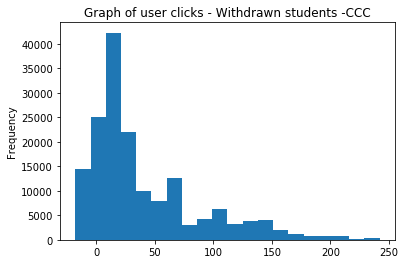

In [116]:
df=studentvle_infoo_withdrawn[studentvle_infoo_withdrawn['code_module']==moduless[0]]
df['date'].plot(kind='hist',bins=20)
plt.title('Graph of user clicks - Withdrawn students -'+moduless[0])
plt.show()

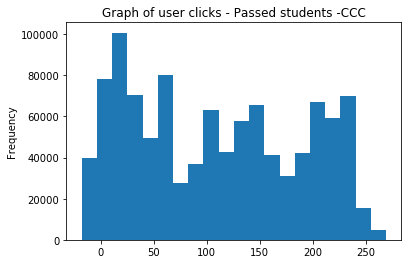

In [118]:
df=studentvle_infoo_else[studentvle_infoo_else['code_module']==moduless[0]]
df['date'].plot(kind='hist',bins=20)
plt.title('Graph of user clicks - Passed students -'+moduless[0])
plt.show()

## Inference
* Based on the analysis above, we conclude that students are finding it difficult to get good grades in the assessments, which could be the reason students start submitting the assessments after due date. They also get lower scores in the assessments
* As their scores decrease as time progresses in the course, they are not confident and start withdrawing from the course
* This can be also be substantiated with the decrease in clicks in the material as time progresses by students who are withdrawing in contrast to students who pass. Passed students tend to me more interactive and engaged with the online material throughout the course